##### ---------------------------------------------------------------------
### Description of project:

#####  As in this project,we predict the customer churn,which means to predict whether the customer leaves the company or not.

##### Here we use the customerId and surname of the customer.

##### Here we use different parameter such as credit score of the customer,tenure of the customer in the company.

##### Here we also the parameter as geography means the location of the customer,customer gender whether it is male or female.

##### Here we also use the age of the customer, balance of the customer.

##### Here we use the numberofproducts column,which defines how many products customer buy.

##### Here we use hascrcard column,which defines whether the customer has the credit card or not.

##### Here we use isactivemember column,which defines whether the customer is active or not.

##### Here we use estimated salary column,which defines the salary of the customer.

##### --------------------------------------------------------------------------------
### Firstly we import all the important libraries.

In [1]:
#Here we import the libraries required for project.

#Linear Algebra library.
import numpy as np

#Data processing library(for I/O and Buffer)
import pandas as pd

#Data Visualization library.
import matplotlib.pyplot as plt

#Statistics visualization library.
import seaborn as sns

#Data Preprocessing library(Labelencoder-->encoding to 0/1,standardscaler-->Scaling data to -3 to +3,OneHotEncoder-->Also do the encoding.
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

#Data splitting and cross validation library.
from sklearn.model_selection import train_test_split,cross_val_score

#Pipelining library(make the transformation easy)
from sklearn.compose import ColumnTransformer

#Logistic Regression library.
from sklearn.linear_model import LogisticRegression

#Support Vector Classifier library.
from sklearn.svm import SVC

#K nearest neighbour classifier library.
from sklearn.neighbors import KNeighborsClassifier

#Naive Bayes classifier library(GaussianNB -->Gaussian Naive Bayes,BernoulliNB -->Bernoulli Naive bayes)
from sklearn.naive_bayes import GaussianNB,BernoulliNB

#Decision tree classifier library.
from sklearn.tree import DecisionTreeClassifier

#Random Forest classifier library.
from sklearn.ensemble import RandomForestClassifier

#Xtream gradient Boost classifier library.
from xgboost import XGBClassifier

#Classifier related statistic library(terms related to classifier model).
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Classifier model pickling library(do the byte conversion of ml model and saved into pkl format)
import pickle

#Warning Handling library.
import warnings

#Here we ignore warnings.
warnings.filterwarnings("ignore")

#####    ----------------------------------------------------------------------------------------
### Now we firstly import the data and read it.

In [2]:
#Here we read the churn dataset.

churn_df=pd.read_csv(r"C:\sudhanshu_projects\project-task-training-course\Customer Churn Prevention Model\Churn_Modelling.csv")

In [3]:
#Now here we check the top records from the dataset.

churn_df.head()

,apst,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Here we check the shape of the dataset.

churn_df.shape

#The shape of churn_df dataset is (10000,14),it means there are 10000 instances and 14 features.

(10000, 14)

In [5]:
#Now we check the column names of the dataset.

churn_df.columns

Index(['apst', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#Here we see that the first three columns are not useful for prediction in any way,so we drop it.

#We drop these columns.
cols=['apst', 'CustomerId', 'Surname']

#Now here we drop the columns and use axis=1,which means column wise and inplace=True,which means we permanently drop it from dataset.
churn_df.drop(columns=cols,axis=1,inplace=True)

In [7]:
#Now we again check the shape of dataset after dropping the column.

churn_df.shape

#Now the shape is (10000,11),it means there are 10000 instances and 11 features.

(10000, 11)

In [8]:
#Now we check the top records from the dataset.

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Here we check is there any null value present in the dataset.

churn_df.isna().sum()

#As there is no column,which contain any null value.

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Here we check the datatype of each column of dataset.

churn_df.dtypes

#As there is both categorical and numerical columns are present.
#categorical columns:--> geography,gender
#Numerical columns:--> creditscore,age,tenure,balance,nomofproducts,hascrcard,isactivemember,estimatedsalary,exited.

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
#Now here we get the complete information of the dataset.

churn_df.info()

#Here we find the number of non-null values,dtype of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
#Now here we find the descriptive statistics of the dataset.

churn_df.describe()

#Here we find the descriptive statistics of numerical column only.
#Here we find the min,max,mean,std,count.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#Now here we get the column names of updated dataset.

churn_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
#Now here we do the labelencoding of gender column.

#Here we convert the categorical column into numerical value and provide one specific integer to specific category,
#Such as male-->1 and female-->0.

#Here we create the labelencoder model object.
le=LabelEncoder()

#Here we fit and transform the gender column.
churn_df["Gender"]=le.fit_transform(churn_df["Gender"])

In [15]:
#Now we check the dataset after do the encoding.

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,delhi,0,42,2,0.00,1,1,1,101348.88,1
1,608,bangalore,0,41,1,83807.86,1,0,1,112542.58,0
2,502,delhi,0,42,8,159660.80,3,1,0,113931.57,1
3,699,delhi,0,39,1,0.00,2,0,0,93826.63,0
4,850,bangalore,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#Here we find the value counts of geography column.

churn_df["Geography"].value_counts()

#Here we have three category such as delhi,mumbai and banglore.

Geography
delhi        5014
mumbai       2509
bangalore    2477
Name: count, dtype: int64

In [17]:
#Now here we do the feature scaling and we create new columns for better prediction.

#Here we use onehotencoder and create the new columns for each category of categorical column.

#As here we apply the onehotencoding on geography column,so we create new column for delhi,banglore and mumbai.

#We can also do this by get_dummies of pandas.

#Here we create the dummies means multiple column from one column.
churn_df[["banglore","delhi","mumbai"]]=pd.get_dummies(churn_df["Geography"],dtype="int")

In [18]:
#Now here we again check the dataset.

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,banglore,delhi,mumbai
0,619,delhi,0,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,608,bangalore,0,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,delhi,0,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,699,delhi,0,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,bangalore,0,43,2,125510.82,1,1,1,79084.10,0,1,0,0


In [19]:
#Now we can remove geography column from the dataset.

churn_df.drop("Geography",axis=1,inplace=True)

In [20]:
#Now we check the top record of updated dataset.

churn_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,banglore,delhi,mumbai
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,0


In [21]:
#Here we check the shape of the updated dataset.

churn_df.shape

#Now the shape is (10000,13),so there are 10000 instances and 13 features.

(10000, 13)

In [22]:
#Now we find the correlation of all features.

#As the correlation is always in the range of [-1,+1].
#(1) If the corr is in the range of (0,1],then it is positive correlation.
#(2) If the corr is in the range of [-1,0),then it is negative correlation.
#(3) If the corr is 0,then it is independent.

corr=churn_df.corr()

corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,banglore,delhi,mumbai
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.004780,-0.008928,0.005538
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.016889,0.006772,-0.024628
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.001685,-0.039208,0.046897
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003868,-0.002848,-0.000567
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.134892,-0.231329,0.401110
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.009039,0.001230,-0.010419
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.013480,0.002467,0.010577
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.016732,0.003317,-0.020486
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.006482,-0.003332,0.010297
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.052667,-0.104955,0.173488


In [23]:
#Now we check the correlation of all features with the target variable i.e Exited.

corr["Exited"].sort_values(ascending=False)

#So the column age,mumbai,balance are positive correlation.
#And the column isactivemember,gender,delhi are negative correlation.

Exited             1.000000
Age                0.285323
mumbai             0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
banglore          -0.052667
delhi             -0.104955
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

#### -------------------------------------------------------------------------------------------------
### Data Visualization.

##### In data visualization,we use matplotlib and seaborn library.

##### As for simple visualization,we use matplotlib.

##### And for statistic visualization,we use seaborn.

##### By using visualization ,we easily get the insight of the dataset.

##### Here we use countplot,barplot,scatterplot etc.

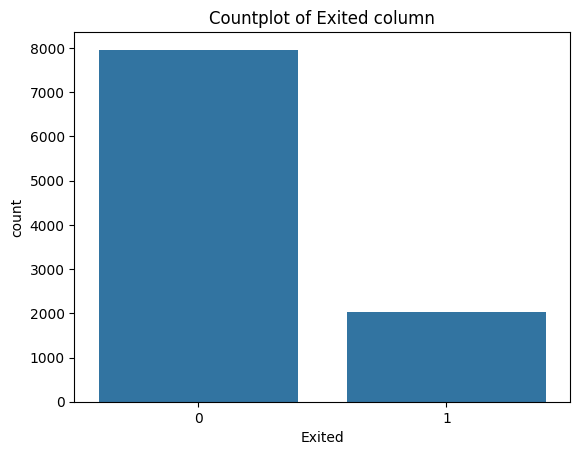

Exited
0    7963
1    2037
Name: count, dtype: int64

In [24]:
#Firstly we get the countplot of Exited column.

sns.countplot(data=churn_df,x="Exited")
plt.title("Countplot of Exited column")
plt.show()

#Here we see that the Exited 0:7963 is thrice the Exited 1:2037.

churn_df["Exited"].value_counts()

In [25]:
#Now here we check the columns names of updated dataset.

churn_df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'banglore',
       'delhi', 'mumbai'],
      dtype='object')

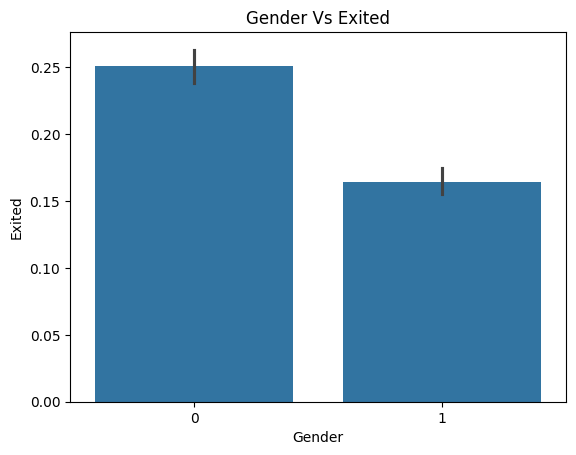

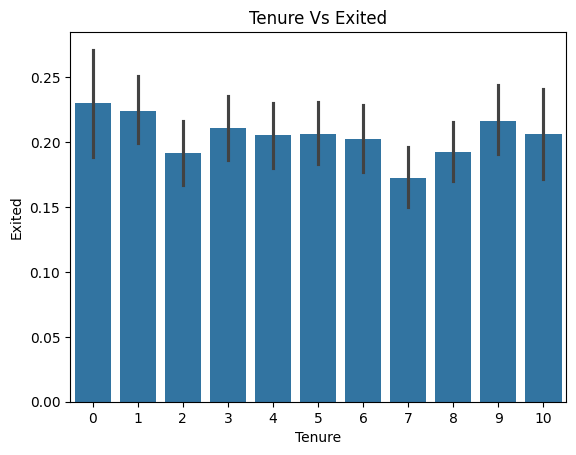

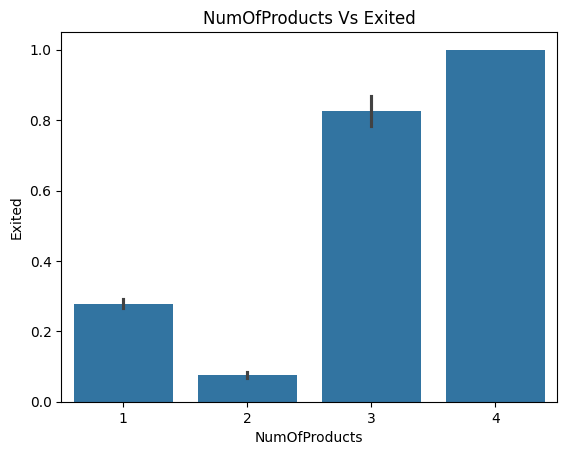

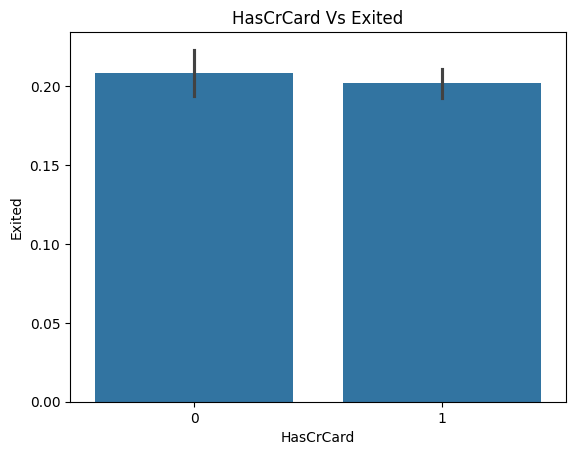

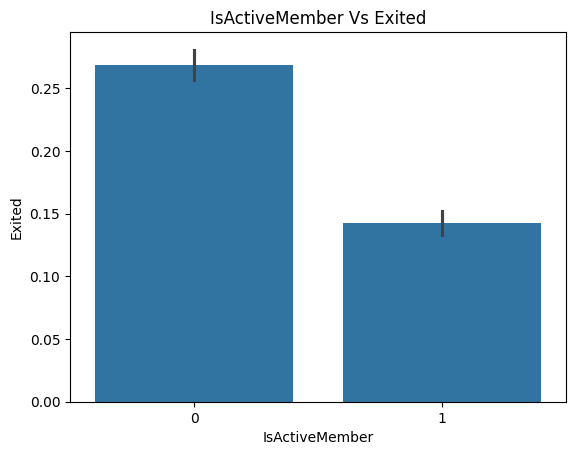

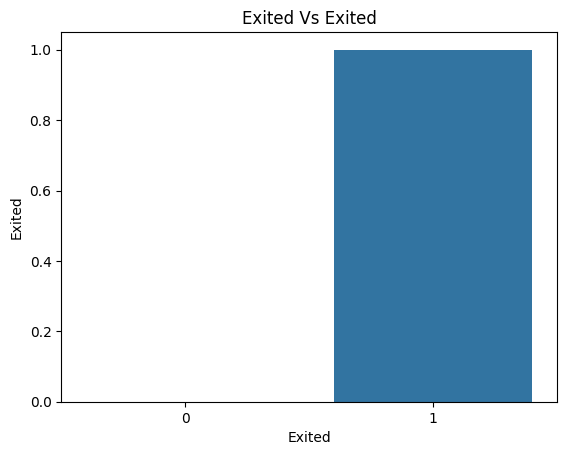

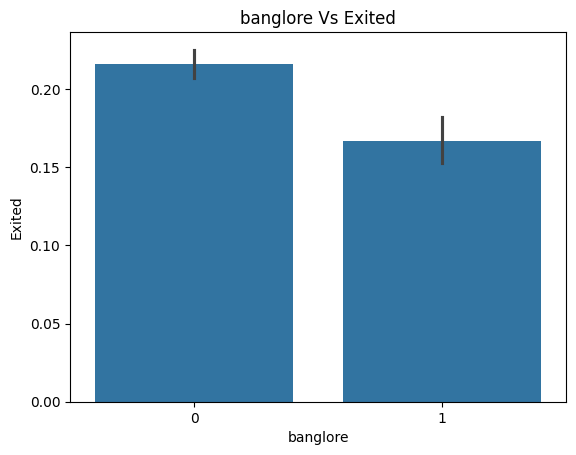

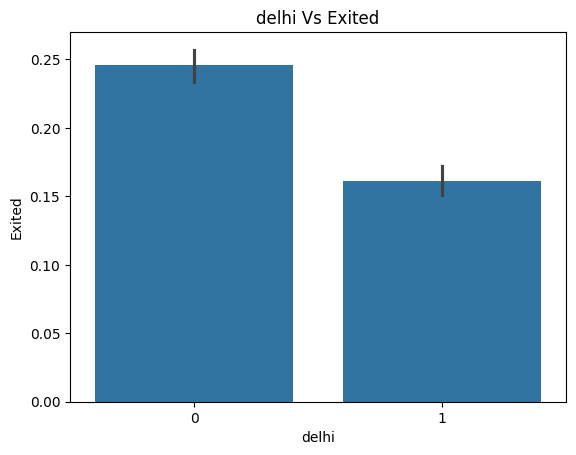

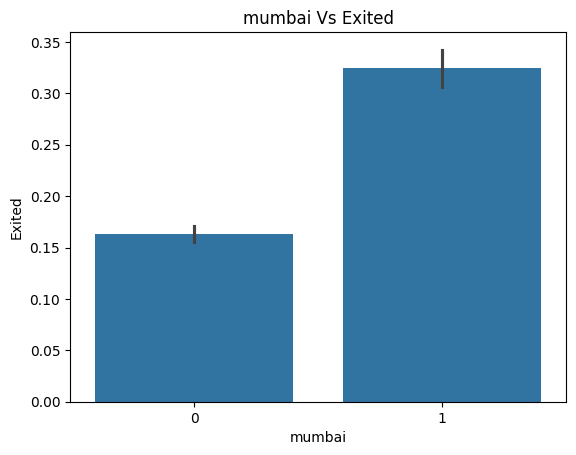

In [26]:
#Here we create the barplot for discrete columns.

cols=['Gender','Tenure','NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited', 'banglore',
       'delhi', 'mumbai']


for col in cols:
 sns.barplot(data=churn_df,x=col,y="Exited")
 plt.title(f"{col} Vs Exited")
 plt.xlabel(f"{col}")
 plt.ylabel("Exited")
 plt.show()

#Conclusion: Here every column has some probability for Exited and on the basis of these we can do some required changes.

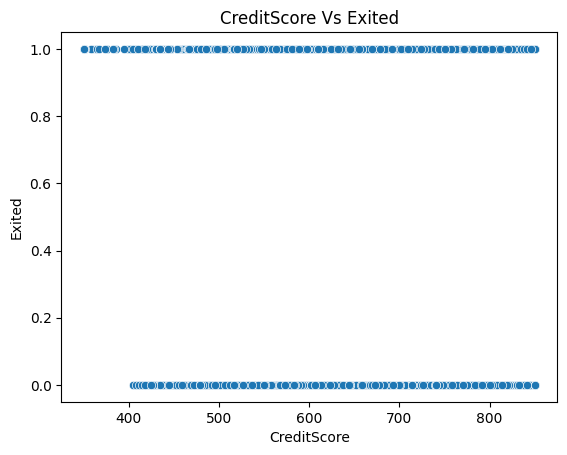

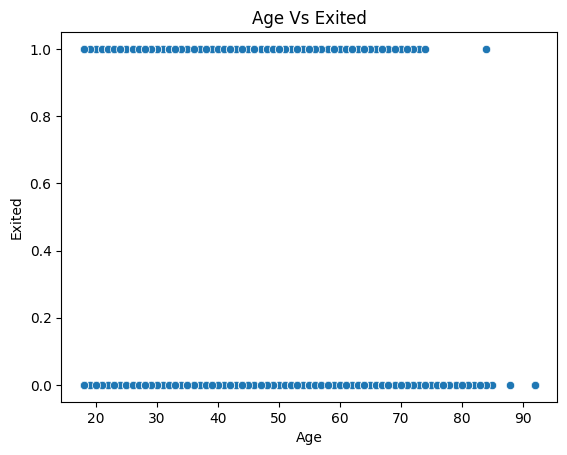

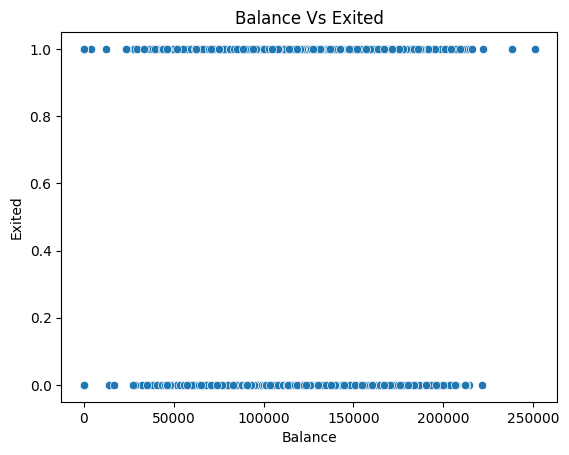

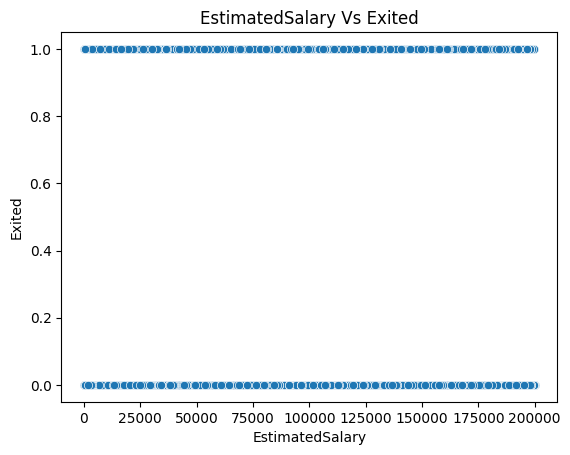

In [27]:
#Now here we plot the scatter plot for continous columns.

#Here are some continous column.
cols=['CreditScore','Age','Balance', 'EstimatedSalary']

for col in cols:
 sns.scatterplot(data=churn_df,x=col,y="Exited")
 plt.title(f"{col} Vs Exited")
 plt.xlabel(f"{col}")
 plt.ylabel("Exited")
 plt.show()

#### ---------------------------------------------------------------------------------------------
### Now here we select dependent and Independent Feature.

##### (1) Independent features are those which is used to predict the value of dependent feature.

##### (2) Dependent feature is that one variable whose value we predict by using all independent feature.

In [28]:
#Here we select the dependent and independent feature of churn dataset.

x=churn_df.drop("Exited",axis=1) #Independent features.

y=churn_df["Exited"] #Dependent feature.

In [29]:
#Now here we select the shape of dependent and Independent feature.

print(f"The shape of independent feature is: {x.shape}.")

#The shape of independent feature is (10000,12).

print(f"The shape of dependent feature is: {y.shape}.")

#The shape of dependent feature is (10000,).

The shape of independent feature is: (10000, 12).
The shape of dependent feature is: (10000,).


#### ---------------------------------------------------------------------------------------------------
### Now here we do train and test split.

##### As we always split the dataset into train and test dataset and we always maintain the split in equal ratio.

##### The different ratios are 70-30,75-25,80-20,85-15.

##### The train data is used to train the model and defines the feature to the model.

##### The test data is used to predict the values using the trained model.

In [30]:
#Here we split the dataset into train-test data.

#Here we split the dataset into 80-20 and random_state is 0.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
#Now we check the shape of x-train/test and y-train/test.

print(f"The shape of x_train is: {x_train.shape}.")

#The shape of x_train is (8000,12).

print(f"The shape of x_test is: {x_test.shape}.")

#The shape of x_test is (2000,12).

print(f"The shape of y_train is: {y_train.shape}.")

#The shape of y_train is (8000,)

print(f"The shape of y_test is: {y_test.shape}.")

#The shape of y_test is (2000,).

The shape of x_train is: (8000, 12).
The shape of x_test is: (2000, 12).
The shape of y_train is: (8000,).
The shape of y_test is: (2000,).


#### -----------------------------------------------------------------------------------------------
### Now here we do standard scaling of x_train and x_test.

##### As the standard scaling is also known as z-score.

##### Here we find the z-score and scaled the data into the range of -3 to +3.

##### Formula of z_score is: z=(x-u)/s,where u=0 and s=1.

In [32]:
#Here we do the scaling of dataset.

#Here we create standard scaler model object.
sc=StandardScaler()

#Here we scaled the x_train data using sc object.
x_train_sc=sc.fit_transform(x_train)

#Here we scaled the x_test data using sc object.
x_test_sc=sc.transform(x_test)

#### ----------------------------------------------------------------------------------------------
### Now we implement the classifier model.

#### ------------------------------------------------------------------------------------------------
### (1) Logistic Regression model.

##### As the logistic regression model uses the sigmoid function.

##### This is one of the probability based machine learning model.

##### Here we adjust the outliers and resolve the problem.

##### Here we created s-curve.

##### Here the condition is we make one threshold value and in case the value equals to or greater than threshold then it is true,

##### and if value is less than threshold than it is false.

##### Formula of sigmoid function: y=1/(1+e^-x)

In [33]:
#1(a) Here we use Logistic regression on original data.

#Here we create logistic regression model object.
lor=LogisticRegression()

#Here we train the lor model on original data.
lor.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using lor model.
y_pred_lor=lor.predict(x_test)

#Here we find the bias of lor model.
bias_lor=lor.score(x_train,y_train)
print(f"The bias of lor model is: {bias_lor}.")

#Here we find the variance of lor model.
variance_lor=lor.score(x_test,y_test)
print(f"The variance of lor model is: {variance_lor}.")

The bias of lor model is: 0.789875.
The variance of lor model is: 0.789.


In [34]:
#1(a) Here we use Logistic regression on scaled data.

#Here we create logistic regression model object.
lor1=LogisticRegression()

#Here we train the lor1 model on scaled data.
lor1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using lor1 model.
y_pred_lor1=lor1.predict(x_test_sc)

#Here we find the bias of lor1 model.
bias_lor1=lor1.score(x_train_sc,y_train)
print(f"The bias of lor1 model is: {bias_lor1}.")

#Here we find the variance of lor1 model.
variance_lor1=lor1.score(x_test_sc,y_test)
print(f"The variance of lor1 model is: {variance_lor1}.")

The bias of lor1 model is: 0.8085.
The variance of lor1 model is: 0.811.


#### ----------------------------------------------------------------------------------------------
### Conclusion of Logistic Regression model.

##### The lor1 has bias 80.85% and variance has 81.10%.

##### The lor has bias 78.98 and variance has 78.90%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of lor1 model is: 0.8085.

The test accuracy of lor1 model is: 0.811.

The confusion matrix of lor1 model is: 
[[1526   69]
 [ 309   96]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1526           69
Predicted No:0            309           96


The accuracy of lor1 model using confusion matrix is: 0.811.

The error of lor1 model using confusion matrix is: 0.18899999999999995.

The precision of lor1 model using confusion matrix is: 0.9567398119122257.

The recall of lor1 model using confusion matrix is: 0.8316076294277929.

The f1_scoreof lor1 model using confusion matrix is: 0.8897959183673468.

The true positive ratio of lor1 model using confusion matrix is: 0.8316076294277929.

The false positive ratio of lor1 model using confusion matrix is: 0.41818181818181815.

The classification report of lor1 model is:               precision    recall  f1-score   support

           0       0.83      0.96      0.

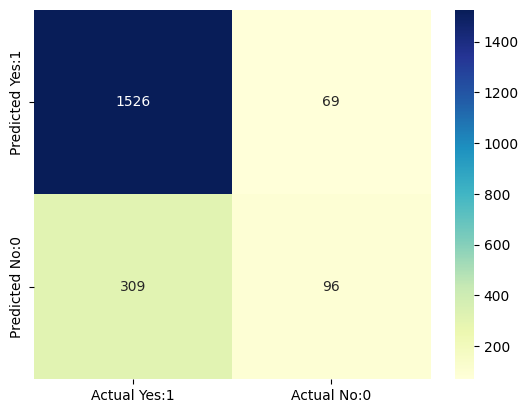

In [35]:
#Now we find the statistics of lor1 model.

#firstly we find the train and test accuracy of lor1 model.

#Train accuracy of lor1 model.
y_train_pred_lor1=lor1.predict(x_train_sc)
ac_train_lor1=accuracy_score(y_train,y_train_pred_lor1)
print(f"The train accuracy of lor1 model is: {ac_train_lor1}.")
print()

#Test accuracy of lor1 model.
ac_test_lor1=accuracy_score(y_test,y_pred_lor1)
print(f"The test accuracy of lor1 model is: {ac_test_lor1}.")
print()

#Now we find the confusion matrix of lor1 model.
cm_lor1=confusion_matrix(y_test,y_pred_lor1)
print("The confusion matrix of lor1 model is: ")
print(cm_lor1)
print()

#Now here we create the dataframe of confusion matrix of lor1 model.
cm_lor1_df=pd.DataFrame(cm_lor1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_lor1_df)
print()

#Now here we make the heatmap of confusion matrix of lor1 model.
sns.heatmap(cm_lor1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_lor1=cm_lor1[0,0] #True positive.
tn_lor1=cm_lor1[1,1] #True  negative.
fp_lor1=cm_lor1[0,1] #False Positive.
fn_lor1=cm_lor1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of lor1 model using confusion matrix. 
ac_cm_lor1=(tp_lor1+tn_lor1)/(tp_lor1+tn_lor1+fp_lor1+fn_lor1)
print(f"The accuracy of lor1 model using confusion matrix is: {ac_cm_lor1}.")
print()

#Here we find the error of lor1 model using confusion matrix.
error_cm_lor1=1-ac_cm_lor1
print(f"The error of lor1 model using confusion matrix is: {error_cm_lor1}.")
print()

#Here we find the precision of lor1 model using confusion matrix. 
precision_cm_lor1=(tp_lor1)/(tp_lor1+fp_lor1)
print(f"The precision of lor1 model using confusion matrix is: {precision_cm_lor1}.")
print()

#Here we find the recall of lor1 model using confusion matrix. 
recall_cm_lor1=(tp_lor1)/(tp_lor1+fn_lor1)
print(f"The recall of lor1 model using confusion matrix is: {recall_cm_lor1}.")
print()

#Here we find the f1_score of lor1 model using confusion matrix. 
f1_score_cm_lor1=(2*precision_cm_lor1*recall_cm_lor1)/(precision_cm_lor1+recall_cm_lor1)
print(f"The f1_scoreof lor1 model using confusion matrix is: {f1_score_cm_lor1}.")
print()

#Here we find the true positive ratio of lor1 model using confusion matrix. 
tpr_cm_lor1=(tp_lor1)/(tp_lor1+fn_lor1)
print(f"The true positive ratio of lor1 model using confusion matrix is: {tpr_cm_lor1}.")
print()

#Here we find the false positive ratio of lor1 model using confusion matrix. 
fpr_cm_lor1=(fp_lor1)/(fp_lor1+tn_lor1)
print(f"The false positive ratio of lor1 model using confusion matrix is: {fpr_cm_lor1}.")
print()

#Now here we find the classification report of lor1 model.
cr_lor1=classification_report(y_test,y_pred_lor1)
print(f"The classification report of lor1 model is: {cr_lor1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of lor1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 19%,precision is 95.67%,recall is 83%,f1_score is 88.97%.

##### As the tpr is 83.16% and fpr is 41.81%.

#### ------------------------------------------------------------------------------------------------

In [36]:
#Now here we try the cross validation on lor1 model.

scores=cross_val_score(estimator=lor1,X=x_train,y=y_train,cv=10)

print(f"The accuracy of cross validation of lor1 model is: {scores.mean()}.")

print(f"The standard deviation of cross validation of lor1 model is: {scores.std()}.")

print(f"The variance of cross validation of lor1 model is: {scores.var()}.")

The accuracy of cross validation of lor1 model is: 0.790625.
The standard deviation of cross validation of lor1 model is: 0.008067101400131284.
The variance of cross validation of lor1 model is: 6.507812500000011e-05.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation on lor1 model.

##### As the accuracy not increases so much.

##### The standard deviation is 0.008.

##### The variance is 0.00065.

#### ------------------------------------------------------------------------------------------------

In [37]:
#Now we apply support vector classifier.

#### ------------------------------------------------------------------------------------------------
### (2) Support Vector Classifier model.

##### As the support vector classifier model uses the concept of support vector machine.

##### In this we use the different components such as Hyperplane,decision boundary,support vector,margin.

##### Here the Hyperplane is same as that of best fit line of ml regression model.

##### Then we select the nearest point of both the category and this is known as support vector. 

##### Then we make the line parallel to the hyperplane which touches the support vector and this is decision boundary.

##### The complete distance between the decision line is margin.

##### As the criterion is we find the min of ||w||/2.

##### And the cost function is min(||w||/2)+C(summation of eta).

##### As whenever the wx+b>0 then it is true classification,otherwise it is false classification.

In [38]:
#2(a) Here we use support vector classifier on original data.

#Here we create support vector classifier model object.
svc=SVC()

#Here we train the svc model on original data.
svc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using svc model.
y_pred_svc=svc.predict(x_test)

#Here we find the bias of svc model.
bias_svc=svc.score(x_train,y_train)
print(f"The bias of svc model is: {bias_svc}.")

#Here we find the variance of svc model.
variance_svc=svc.score(x_test,y_test)
print(f"The variance of svc model is: {variance_svc}.")

The bias of svc model is: 0.796.
The variance of svc model is: 0.7975.


In [39]:
#2(b) Here we use support vector classifier on scaled data.

#Here we create support vector classifier model object.
svc1=SVC()

#Here we train the svc1 model on scaled data.
svc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using svc1 model.
y_pred_svc1=svc1.predict(x_test_sc)

#Here we find the bias of svc1 model.
bias_svc1=svc1.score(x_train_sc,y_train)
print(f"The bias of svc1 model is: {bias_svc1}.")

#Here we find the variance of svc1 model.
variance_svc1=svc1.score(x_test_sc,y_test)
print(f"The variance of svc1 model is: {variance_svc1}.")

The bias of svc1 model is: 0.864875.
The variance of svc1 model is: 0.865.


#### ----------------------------------------------------------------------------------------------
### Conclusion of Support Vector Classifier model.

##### The svc1 has bias 86.48% and variance has 86.50%.

##### The svc has bias 79.60 and variance has 79.75%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of svc1 model is: 0.864875.

The test accuracy of svc1 model is: 0.865.

The confusion matrix of svc1 model is: 
[[1550   45]
 [ 225  180]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1550           45
Predicted No:0            225          180


The accuracy of svc1 model using confusion matrix is: 0.865.

The error of svc1 model using confusion matrix is: 0.135.

The precision of svc1 model using confusion matrix is: 0.9717868338557993.

The recall of svc1 model using confusion matrix is: 0.8732394366197183.

The f1_scoreof svc1 model using confusion matrix is: 0.9198813056379821.

The true positive ratio of svc1 model using confusion matrix is: 0.8732394366197183.

The false positive ratio of svc1 model using confusion matrix is: 0.2.

The classification report of svc1 model is:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1   

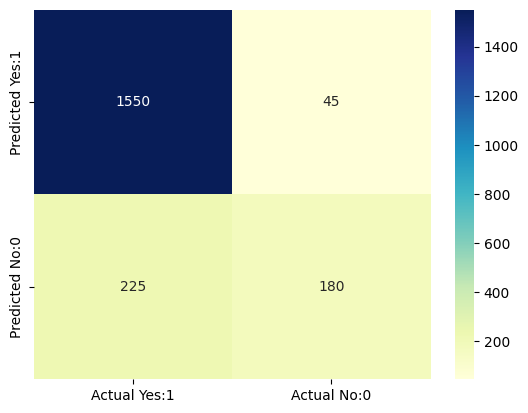

In [40]:
#Now we find the statistics of svc1 model.

#firstly we find the train and test accuracy of svc1 model.

#Train accuracy of svc1 model.
y_train_pred_svc1=svc1.predict(x_train_sc)
ac_train_svc1=accuracy_score(y_train,y_train_pred_svc1)
print(f"The train accuracy of svc1 model is: {ac_train_svc1}.")
print()

#Test accuracy of svc1 model.
ac_test_svc1=accuracy_score(y_test,y_pred_svc1)
print(f"The test accuracy of svc1 model is: {ac_test_svc1}.")
print()

#Now we find the confusion matrix of svc1 model.
cm_svc1=confusion_matrix(y_test,y_pred_svc1)
print("The confusion matrix of svc1 model is: ")
print(cm_svc1)
print()

#Now here we create the dataframe of confusion matrix of svc1 model.
cm_svc1_df=pd.DataFrame(cm_svc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_svc1_df)
print()

#Now here we make the heatmap of confusion matrix of svc1 model.
sns.heatmap(cm_svc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_svc1=cm_svc1[0,0] #True positive.
tn_svc1=cm_svc1[1,1] #True  negative.
fp_svc1=cm_svc1[0,1] #False Positive.
fn_svc1=cm_svc1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of svc1 model using confusion matrix. 
ac_cm_svc1=(tp_svc1+tn_svc1)/(tp_svc1+tn_svc1+fp_svc1+fn_svc1)
print(f"The accuracy of svc1 model using confusion matrix is: {ac_cm_svc1}.")
print()

#Here we find the error of svc1 model using confusion matrix.
error_cm_svc1=1-ac_cm_svc1
print(f"The error of svc1 model using confusion matrix is: {error_cm_svc1}.")
print()

#Here we find the precision of svc1 model using confusion matrix. 
precision_cm_svc1=(tp_svc1)/(tp_svc1+fp_svc1)
print(f"The precision of svc1 model using confusion matrix is: {precision_cm_svc1}.")
print()

#Here we find the recall of svc1 model using confusion matrix. 
recall_cm_svc1=(tp_svc1)/(tp_svc1+fn_svc1)
print(f"The recall of svc1 model using confusion matrix is: {recall_cm_svc1}.")
print()

#Here we find the f1_score of svc1 model using confusion matrix. 
f1_score_cm_svc1=(2*precision_cm_svc1*recall_cm_svc1)/(precision_cm_svc1+recall_cm_svc1)
print(f"The f1_scoreof svc1 model using confusion matrix is: {f1_score_cm_svc1}.")
print()

#Here we find the true positive ratio of svc1 model using confusion matrix. 
tpr_cm_svc1=(tp_svc1)/(tp_svc1+fn_svc1)
print(f"The true positive ratio of svc1 model using confusion matrix is: {tpr_cm_svc1}.")
print()

#Here we find the false positive ratio of svc1 model using confusion matrix. 
fpr_cm_svc1=(fp_svc1)/(fp_svc1+tn_svc1)
print(f"The false positive ratio of svc1 model using confusion matrix is: {fpr_cm_svc1}.")
print()

#Now here we find the classification report of svc1 model.
cr_svc1=classification_report(y_test,y_pred_svc1)
print(f"The classification report of svc1 model is: {cr_svc1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of svc1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 13%,precision is 97.17%,recall is 87.32%,f1_score is 91.98%.

##### As the tpr is 87.32% and fpr is 20%.

#### ------------------------------------------------------------------------------------------------


In [41]:
#Now here we try the cross validation on svc1 model.

scores=cross_val_score(estimator=svc1,X=x_train,y=y_train,cv=10)

print(f"The accuracy of cross validation of svc1 model is: {scores.mean()}.")

print(f"The standard deviation of cross validation of svc1 model is: {scores.std()}.")

print(f"The variance of cross validation of svc1 model is: {scores.var()}.")

The accuracy of cross validation of svc1 model is: 0.796.
The standard deviation of cross validation of svc1 model is: 0.0004999999999999894.
The variance of cross validation of svc1 model is: 2.4999999999998935e-07.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation on svc1 model.

##### As the accuracy decreases to 79.6%.

##### The standard deviation is 0.0004.

##### The variance is 0.00024.

#### ------------------------------------------------------------------------------------------------

In [42]:
#Now we apply knearest neighbour classifier.

#### ------------------------------------------------------------------------------------------------
### (3) Knearest neighbour classifier model.

##### As the knearest neighbour classifier model uses the concept of distance matrix.

##### In this we use the different distance matrix such as manhattan and euclidean distance.

##### Now we select the k value firstly i.e the no of neighbours.

##### Then we find the distance of all data points from the new data value. 

##### Then we select the k nearest values on the basis of distance.

##### After that we count the data point belongs to different category.

##### Then we check which category has maximum values.

##### Then we assign the new data point to that class.

##### As the euclidean distance is also known as far distance and manhattan is shorter distance.

In [43]:
#3(a) Here we use knearest neighbour classifier on original data.

#Here we create knearest neighbour classifier model object.
knc=KNeighborsClassifier()

#Here we train the knc model on original data.
knc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using knc model.
y_pred_knc=knc.predict(x_test)

#Here we find the bias of knc model.
bias_knc=knc.score(x_train,y_train)
print(f"The bias of knc model is: {bias_knc}.")

#Here we find the variance of knc model.
variance_knc=knc.score(x_test,y_test)
print(f"The variance of knc model is: {variance_knc}.")

The bias of knc model is: 0.816.
The variance of knc model is: 0.7645.


In [44]:
#3(b) Here we use knearest neighbour classifier on scaled data.

#Here we create knearest neighbour classifier model object.
knc1=KNeighborsClassifier()

#Here we train the knc1 model on scaled data.
knc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using knc1 model.
y_pred_knc1=knc1.predict(x_test_sc)

#Here we find the bias of knc1 model.
bias_knc1=knc1.score(x_train_sc,y_train)
print(f"The bias of knc1 model is: {bias_knc1}.")

#Here we find the variance of knc1 model.
variance_knc1=knc1.score(x_test_sc,y_test)
print(f"The variance of knc1 model is: {variance_knc1}.")

The bias of knc1 model is: 0.871375.
The variance of knc1 model is: 0.827.


#### ----------------------------------------------------------------------------------------------
### Conclusion of knearest neighbour Classifier model.

##### The knc1 has bias 87.13% and variance has 82.70%.

##### The knc has bias 81.60 and variance has 76.45%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of knc1 model is: 0.871375.

The test accuracy of knc1 model is: 0.827.

The confusion matrix of knc1 model is: 
[[1486  109]
 [ 237  168]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1486          109
Predicted No:0            237          168


The accuracy of knc1 model using confusion matrix is: 0.827.

The error of knc1 model using confusion matrix is: 0.17300000000000004.

The precision of knc1 model using confusion matrix is: 0.9316614420062695.

The recall of knc1 model using confusion matrix is: 0.8624492164828786.

The f1_scoreof knc1 model using confusion matrix is: 0.8957203134418323.

The true positive ratio of knc1 model using confusion matrix is: 0.8624492164828786.

The false positive ratio of knc1 model using confusion matrix is: 0.3935018050541516.

The classification report of knc1 model is:               precision    recall  f1-score   support

           0       0.86      0.93      0

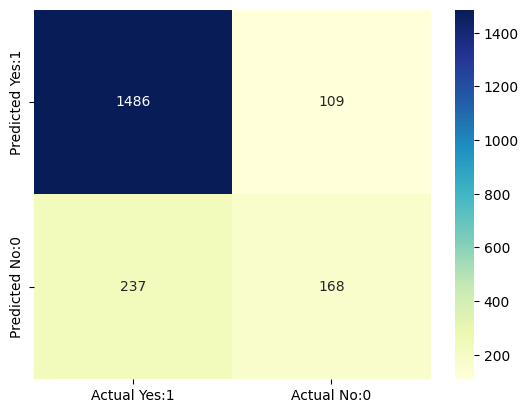

In [45]:
#Now we find the statistics of knc1 model.

#firstly we find the train and test accuracy of knc1 model.

#Train accuracy of knc1 model.
y_train_pred_knc1=knc1.predict(x_train_sc)
ac_train_knc1=accuracy_score(y_train,y_train_pred_knc1)
print(f"The train accuracy of knc1 model is: {ac_train_knc1}.")
print()

#Test accuracy of knc1 model.
ac_test_knc1=accuracy_score(y_test,y_pred_knc1)
print(f"The test accuracy of knc1 model is: {ac_test_knc1}.")
print()

#Now we find the confusion matrix of knc1 model.
cm_knc1=confusion_matrix(y_test,y_pred_knc1)
print("The confusion matrix of knc1 model is: ")
print(cm_knc1)
print()

#Now here we create the dataframe of confusion matrix of knc1 model.
cm_knc1_df=pd.DataFrame(cm_knc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_knc1_df)
print()

#Now here we make the heatmap of confusion matrix of knc1 model.
sns.heatmap(cm_knc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_knc1=cm_knc1[0,0] #True positive.
tn_knc1=cm_knc1[1,1] #True  negative.
fp_knc1=cm_knc1[0,1] #False Positive.
fn_knc1=cm_knc1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of knc1 model using confusion matrix. 
ac_cm_knc1=(tp_knc1+tn_knc1)/(tp_knc1+tn_knc1+fp_knc1+fn_knc1)
print(f"The accuracy of knc1 model using confusion matrix is: {ac_cm_knc1}.")
print()

#Here we find the error of knc1 model using confusion matrix.
error_cm_knc1=1-ac_cm_knc1
print(f"The error of knc1 model using confusion matrix is: {error_cm_knc1}.")
print()

#Here we find the precision of knc1 model using confusion matrix. 
precision_cm_knc1=(tp_knc1)/(tp_knc1+fp_knc1)
print(f"The precision of knc1 model using confusion matrix is: {precision_cm_knc1}.")
print()

#Here we find the recall of knc1 model using confusion matrix. 
recall_cm_knc1=(tp_knc1)/(tp_knc1+fn_knc1)
print(f"The recall of knc1 model using confusion matrix is: {recall_cm_knc1}.")
print()

#Here we find the f1_score of knc1 model using confusion matrix. 
f1_score_cm_knc1=(2*precision_cm_knc1*recall_cm_knc1)/(precision_cm_knc1+recall_cm_knc1)
print(f"The f1_scoreof knc1 model using confusion matrix is: {f1_score_cm_knc1}.")
print()

#Here we find the true positive ratio of knc1 model using confusion matrix. 
tpr_cm_knc1=(tp_knc1)/(tp_knc1+fn_knc1)
print(f"The true positive ratio of knc1 model using confusion matrix is: {tpr_cm_knc1}.")
print()

#Here we find the false positive ratio of knc1 model using confusion matrix. 
fpr_cm_knc1=(fp_knc1)/(fp_knc1+tn_knc1)
print(f"The false positive ratio of knc1 model using confusion matrix is: {fpr_cm_knc1}.")
print()

#Now here we find the classification report of knc1 model.
cr_knc1=classification_report(y_test,y_pred_knc1)
print(f"The classification report of knc1 model is: {cr_knc1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of svc1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 17%,precision is 93.16%,recall is 86.24%,f1_score is 89.57%.

##### As the tpr is 86.24% and fpr is 39%.

#### ------------------------------------------------------------------------------------------------

In [46]:
#Now here we try the cross validation on knc1 model.

scores=cross_val_score(estimator=knc1,X=x_train,y=y_train,cv=10)

print(f"The accuracy of cross validation of knc1 model is: {scores.mean()}.")

print(f"The standard deviation of cross validation of knc1 model is: {scores.std()}.")

print(f"The variance of cross validation of knc1 model is: {scores.var()}.")

The accuracy of cross validation of knc1 model is: 0.7581249999999999.
The standard deviation of cross validation of knc1 model is: 0.008277416565571653.
The variance of cross validation of knc1 model is: 6.851562500000003e-05.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation on knc1 model.

##### As the accuracy decreases to 75.8%.

##### The standard deviation is 0.0008.

##### The variance is 0.00068.

#### ------------------------------------------------------------------------------------------------

In [48]:
#Now we apply Gaussian Naive Bayes classifier.

#### ------------------------------------------------------------------------------------------------
### (4) Gaussian Naive Bayes Classifier model.

##### As the gaussian naive bayes classifier model uses the concept of bayesian theorem.

##### In this we use the different components such as probability,conditional probability.

##### It is also one of the probability based ml algorithm.

##### In this we find the probability of new data point with all the existing criteria. 

##### Then we multiply the probability of one class value w.r.t all criteria.

##### Here we only solve the problem of gaussian distributed data.

##### It is used for binary classification only.

##### posterior=(likelihood*prior)/(marginal likelihood)

##### As we select the class for which we get highest probability.

In [49]:
#4(a) Here we use gaussian naive bayes classifier on original data.

#Here we create gaussian naive bayes classifier model object.
gnb=GaussianNB()

#Here we train the gnb model on original data.
gnb.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using gnb model.
y_pred_gnb=gnb.predict(x_test)

#Here we find the bias of gnb model.
bias_gnb=gnb.score(x_train,y_train)
print(f"The bias of gnb model is: {bias_gnb}.")

#Here we find the variance of gnb model.
variance_gnb=gnb.score(x_test,y_test)
print(f"The variance of gnb model is: {variance_gnb}.")

The bias of gnb model is: 0.785375.
The variance of gnb model is: 0.7845.


In [50]:
#4(b) Here we use gaussian naive bayes classifier on scaled data.

#Here we create gaussian naive bayes classifier model object.
gnb1=GaussianNB()

#Here we train the gnb1 model on scaled data.
gnb1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using gnb1 model.
y_pred_gnb1=gnb1.predict(x_test_sc)

#Here we find the bias of gnb1 model.
bias_gnb1=gnb1.score(x_train_sc,y_train)
print(f"The bias of gnb1 model is: {bias_gnb1}.")

#Here we find the variance of gnb1 model.
variance_gnb1=gnb1.score(x_test_sc,y_test)
print(f"The variance of gnb1 model is: {variance_gnb1}.")

The bias of gnb1 model is: 0.817375.
The variance of gnb1 model is: 0.8155.


#### ----------------------------------------------------------------------------------------------
### Conclusion of Gaussian naive bayes Classifier model.

##### The gnb1 has bias 81.73% and variance has 81.55%.

##### The gnb has bias 78.53 and variance has 78.45%.

#### -----------------------------------------------------------------------------------------------

In [51]:
#Now we apply Bernoulli naive bayes classifier.

#### ------------------------------------------------------------------------------------------------
### (5) Bernoulli Naive Bayes Classifier model.

##### As the bernoulli naive bayes classifier model uses the concept of bayesian theorem.

##### In this we use the different components such as probability,conditional probability.

##### It is also one of the probability based ml algorithm.

##### In this we find the probability of new data point with all the existing criteria. 

##### Then we multiply the probability of one class value w.r.t all criteria.

##### Here we only solve the problem of bernoulli distributed data.

##### It is used for binary classification only.

##### posterior=(likelihood*prior)/(marginal likelihood)

##### As we select the class for which we get highest probability.

In [53]:
#5(a) Here we use bernoulli naive bayes classifier on original data.

#Here we create bernoulli naive bayes classifier model object.
bnb=BernoulliNB()

#Here we train the bnb model on original data.
bnb.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using bnb model.
y_pred_bnb=bnb.predict(x_test)

#Here we find the bias of bnb model.
bias_bnb=bnb.score(x_train,y_train)
print(f"The bias of bnb model is: {bias_bnb}.")

#Here we find the variance of bnb model.
variance_bnb=bnb.score(x_test,y_test)
print(f"The variance of bnb model is: {variance_bnb}.")

The bias of bnb model is: 0.790375.
The variance of bnb model is: 0.786.


In [54]:
#5(b) Here we use bernoulli naive bayes classifier on scaled data.

#Here we create bernoulli naive bayes classifier model object.
bnb1=BernoulliNB()

#Here we train the bnb1 model on scaled data.
bnb1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using bnb1 model.
y_pred_bnb1=bnb1.predict(x_test_sc)

#Here we find the bias of bnb1 model.
bias_bnb1=bnb1.score(x_train_sc,y_train)
print(f"The bias of bnb1 model is: {bias_bnb1}.")

#Here we find the variance of bnb1 model.
variance_bnb1=bnb1.score(x_test_sc,y_test)
print(f"The variance of bnb1 model is: {variance_bnb1}.")

The bias of bnb1 model is: 0.807375.
The variance of bnb1 model is: 0.7985.


#### ----------------------------------------------------------------------------------------------
### Conclusion of Bernoulli naive bayes Classifier model.

##### The bnb1 has bias 80.73% and variance has 79.85%.

##### The gnb has bias 79% and variance has 78.60%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of gnb1 model is: 0.817375.

The test accuracy of gnb1 model is: 0.8155.

The confusion matrix of gnb1 model is: 
[[1464  131]
 [ 238  167]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1464          131
Predicted No:0            238          167


The accuracy of gnb1 model using confusion matrix is: 0.8155.

The error of gnb1 model using confusion matrix is: 0.1845.

The precision of gnb1 model using confusion matrix is: 0.9178683385579938.

The recall of gnb1 model using confusion matrix is: 0.8601645123384254.

The f1_scoreof gnb1 model using confusion matrix is: 0.8880800727934486.

The true positive ratio of gnb1 model using confusion matrix is: 0.8601645123384254.

The false positive ratio of gnb1 model using confusion matrix is: 0.4395973154362416.

The classification report of gnb1 model is:               precision    recall  f1-score   support

           0       0.86      0.92      0.89      15

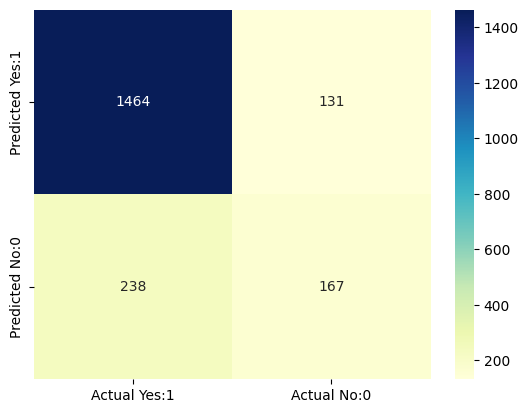

In [55]:
#Now we find the statistics of gnb1 model.

#firstly we find the train and test accuracy of gnb1 model.

#Train accuracy of gnb1 model.
y_train_pred_gnb1=gnb1.predict(x_train_sc)
ac_train_gnb1=accuracy_score(y_train,y_train_pred_gnb1)
print(f"The train accuracy of gnb1 model is: {ac_train_gnb1}.")
print()

#Test accuracy of gnb1 model.
ac_test_gnb1=accuracy_score(y_test,y_pred_gnb1)
print(f"The test accuracy of gnb1 model is: {ac_test_gnb1}.")
print()

#Now we find the confusion matrix of gnb1 model.
cm_gnb1=confusion_matrix(y_test,y_pred_gnb1)
print("The confusion matrix of gnb1 model is: ")
print(cm_gnb1)
print()

#Now here we create the dataframe of confusion matrix of gnb1 model.
cm_gnb1_df=pd.DataFrame(cm_gnb1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_gnb1_df)
print()

#Now here we make the heatmap of confusion matrix of gnb1 model.
sns.heatmap(cm_gnb1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_gnb1=cm_gnb1[0,0] #True positive.
tn_gnb1=cm_gnb1[1,1] #True  negative.
fp_gnb1=cm_gnb1[0,1] #False Positive.
fn_gnb1=cm_gnb1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of gnb1 model using confusion matrix. 
ac_cm_gnb1=(tp_gnb1+tn_gnb1)/(tp_gnb1+tn_gnb1+fp_gnb1+fn_gnb1)
print(f"The accuracy of gnb1 model using confusion matrix is: {ac_cm_gnb1}.")
print()

#Here we find the error of gnb1 model using confusion matrix.
error_cm_gnb1=1-ac_cm_gnb1
print(f"The error of gnb1 model using confusion matrix is: {error_cm_gnb1}.")
print()

#Here we find the precision of gnb1 model using confusion matrix. 
precision_cm_gnb1=(tp_gnb1)/(tp_gnb1+fp_gnb1)
print(f"The precision of gnb1 model using confusion matrix is: {precision_cm_gnb1}.")
print()

#Here we find the recall of gnb1 model using confusion matrix. 
recall_cm_gnb1=(tp_gnb1)/(tp_gnb1+fn_gnb1)
print(f"The recall of gnb1 model using confusion matrix is: {recall_cm_gnb1}.")
print()

#Here we find the f1_score of gnb1 model using confusion matrix. 
f1_score_cm_gnb1=(2*precision_cm_gnb1*recall_cm_gnb1)/(precision_cm_gnb1+recall_cm_gnb1)
print(f"The f1_scoreof gnb1 model using confusion matrix is: {f1_score_cm_gnb1}.")
print()

#Here we find the true positive ratio of gnb1 model using confusion matrix. 
tpr_cm_gnb1=(tp_gnb1)/(tp_gnb1+fn_gnb1)
print(f"The true positive ratio of gnb1 model using confusion matrix is: {tpr_cm_gnb1}.")
print()

#Here we find the false positive ratio of gnb1 model using confusion matrix. 
fpr_cm_gnb1=(fp_gnb1)/(fp_gnb1+tn_gnb1)
print(f"The false positive ratio of gnb1 model using confusion matrix is: {fpr_cm_gnb1}.")
print()

#Now here we find the classification report of gnb1 model.
cr_gnb1=classification_report(y_test,y_pred_gnb1)
print(f"The classification report of gnb1 model is: {cr_gnb1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of gnb1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 18%,precision is 91%,recall is 86.24%,f1_score is 88.80%.

##### As the tpr is 86% and fpr is 44%.

#### ------------------------------------------------------------------------------------------------

In [56]:
#Now we apply decision tree classifier .

#### ------------------------------------------------------------------------------------------------
### (6) Decision tree Classifier model.

##### As the decision tree classifier model uses the concept of tree.

##### In this we use the different components entropy,gini index and information gain.

##### Information gain is defined as the amount of information we get from the features.

##### We choose the root node as that independent feature whose information gain is maximum.

##### Then we find the entropy and gini impurity.

##### We split the node on that basis,for which impurity is less.

##### formula of entropy is: -((p-logp-)+(p+logp+)) ,where p-=n/(p+n) and p+=p/(p+n)

##### formula of gini index is: 1-(summation of p^2). 

##### Then we find Information gain as IG=Ig of dependent feature-weighted gain.

In [68]:
#6(a) Here we use Decision tree classifier on original data.

#Here we create decision tree classifier model object.
dtc=DecisionTreeClassifier(criterion="gini",random_state=0,min_samples_split=6,max_depth=4)

#Here we train the dtc model on original data.
dtc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using dtc model.
y_pred_dtc=dtc.predict(x_test)

#Here we find the bias of dtc model.
bias_dtc=dtc.score(x_train,y_train)
print(f"The bias of dtc model is: {bias_dtc}.")

#Here we find the variance of dtc model.
variance_dtc=dtc.score(x_test,y_test)
print(f"The variance of dtc model is: {variance_dtc}.")

The bias of dtc model is: 0.850375.
The variance of dtc model is: 0.8565.


In [71]:
#6(b) Here we use Decision tree classifier on scaled data.

#Here we create decision tree classifier model object.
dtc1=DecisionTreeClassifier(criterion="gini",random_state=0,min_samples_split=6,max_depth=7)

#Here we train the dtc1 model on scaled data.
dtc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using dtc1 model.
y_pred_dtc1=dtc1.predict(x_test_sc)

#Here we find the bias of dtc1 model.
bias_dtc1=dtc1.score(x_train_sc,y_train)
print(f"The bias of dtc1 model is: {bias_dtc1}.")

#Here we find the variance of dtc1 model.
variance_dtc1=dtc1.score(x_test_sc,y_test)
print(f"The variance of dtc1 model is: {variance_dtc1}.")

The bias of dtc1 model is: 0.87275.
The variance of dtc1 model is: 0.857.


#### ----------------------------------------------------------------------------------------------
### Conclusion of Decision tree Classifier model.

##### The dtc1 has bias 87.27% and variance has 85.70%.

##### The dtc has bias 85.30% and variance has 85.65%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of dtc1 model is: 0.87275.

The test accuracy of dtc1 model is: 0.857.

The confusion matrix of dtc1 model is: 
[[1499   96]
 [ 190  215]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1499           96
Predicted No:0            190          215


The accuracy of dtc1 model using confusion matrix is: 0.857.

The error of dtc1 model using confusion matrix is: 0.14300000000000002.

The precision of dtc1 model using confusion matrix is: 0.9398119122257054.

The recall of dtc1 model using confusion matrix is: 0.8875074008288928.

The f1_scoreof dtc1 model using confusion matrix is: 0.9129110840438489.

The true positive ratio of dtc1 model using confusion matrix is: 0.8875074008288928.

The false positive ratio of dtc1 model using confusion matrix is: 0.3086816720257235.

The classification report of dtc1 model is:               precision    recall  f1-score   support

           0       0.89      0.94      0.

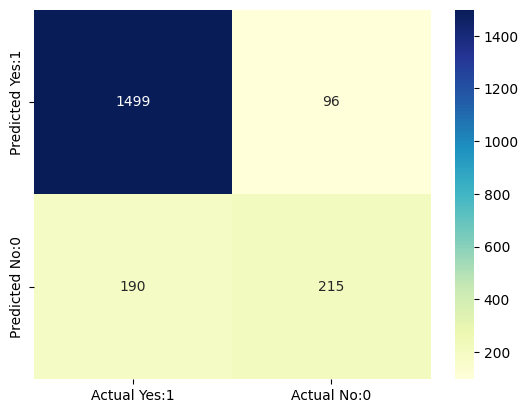

In [72]:
#Now we find the statistics of dtc1 model.

#firstly we find the train and test accuracy of dtc1 model.

#Train accuracy of dtc1 model.
y_train_pred_dtc1=dtc1.predict(x_train_sc)
ac_train_dtc1=accuracy_score(y_train,y_train_pred_dtc1)
print(f"The train accuracy of dtc1 model is: {ac_train_dtc1}.")
print()

#Test accuracy of dtc1 model.
ac_test_dtc1=accuracy_score(y_test,y_pred_dtc1)
print(f"The test accuracy of dtc1 model is: {ac_test_dtc1}.")
print()

#Now we find the confusion matrix of dtc1 model.
cm_dtc1=confusion_matrix(y_test,y_pred_dtc1)
print("The confusion matrix of dtc1 model is: ")
print(cm_dtc1)
print()

#Now here we create the dataframe of confusion matrix of dtc1 model.
cm_dtc1_df=pd.DataFrame(cm_dtc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_dtc1_df)
print()

#Now here we make the heatmap of confusion matrix of dtc1 model.
sns.heatmap(cm_dtc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_dtc1=cm_dtc1[0,0] #True positive.
tn_dtc1=cm_dtc1[1,1] #True  negative.
fp_dtc1=cm_dtc1[0,1] #False Positive.
fn_dtc1=cm_dtc1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of dtc1 model using confusion matrix. 
ac_cm_dtc1=(tp_dtc1+tn_dtc1)/(tp_dtc1+tn_dtc1+fp_dtc1+fn_dtc1)
print(f"The accuracy of dtc1 model using confusion matrix is: {ac_cm_dtc1}.")
print()

#Here we find the error of dtc1 model using confusion matrix.
error_cm_dtc1=1-ac_cm_dtc1
print(f"The error of dtc1 model using confusion matrix is: {error_cm_dtc1}.")
print()

#Here we find the precision of dtc1 model using confusion matrix. 
precision_cm_dtc1=(tp_dtc1)/(tp_dtc1+fp_dtc1)
print(f"The precision of dtc1 model using confusion matrix is: {precision_cm_dtc1}.")
print()

#Here we find the recall of dtc1 model using confusion matrix. 
recall_cm_dtc1=(tp_dtc1)/(tp_dtc1+fn_dtc1)
print(f"The recall of dtc1 model using confusion matrix is: {recall_cm_dtc1}.")
print()

#Here we find the f1_score of dtc1 model using confusion matrix. 
f1_score_cm_dtc1=(2*precision_cm_dtc1*recall_cm_dtc1)/(precision_cm_dtc1+recall_cm_dtc1)
print(f"The f1_scoreof dtc1 model using confusion matrix is: {f1_score_cm_dtc1}.")
print()

#Here we find the true positive ratio of dtc1 model using confusion matrix. 
tpr_cm_dtc1=(tp_dtc1)/(tp_dtc1+fn_dtc1)
print(f"The true positive ratio of dtc1 model using confusion matrix is: {tpr_cm_dtc1}.")
print()

#Here we find the false positive ratio of dtc1 model using confusion matrix. 
fpr_cm_dtc1=(fp_dtc1)/(fp_dtc1+tn_dtc1)
print(f"The false positive ratio of dtc1 model using confusion matrix is: {fpr_cm_dtc1}.")
print()

#Now here we find the classification report of dtc1 model.
cr_dtc1=classification_report(y_test,y_pred_dtc1)
print(f"The classification report of dtc1 model is: {cr_dtc1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of dtc1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 14%,precision is 94%,recall is 88.75%,f1_score is 91.29%.

##### As the tpr is 88.75% and fpr is 30%.

#### ------------------------------------------------------------------------------------------------


In [73]:
#Now we apply random forest classifier.

#### ------------------------------------------------------------------------------------------------
### (7) Random forest Classifier model.

##### As the random forest classifier model uses the concept of ensemble learning.

##### As this is the example of boosting.

##### In this we use the different components such as bootstraping,voting.

##### Bootstraping means to split the dataset into random manner to apply different models.

##### And this is also known as parallel ensemble.

##### We can use any one of the voting i.e soft and hard voting.

##### Here we apply different algorithm on the dataset and then take mode of the data of all models..

##### Here we use n_estimators which defines the number of trees we made.

##### And by using this we can resolve overfitting.

In [85]:
#7(a) Here we use random forest classifier on original data.

#Here we create random forest classifier model object.
rfc=RandomForestClassifier(n_estimators=55,min_samples_split=7,random_state=0)

#Here we train the rfc model on original data.
rfc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using rfc model.
y_pred_rfc=rfc.predict(x_test)

#Here we find the bias of rfc model.
bias_rfc=rfc.score(x_train,y_train)
print(f"The bias of rfc model is: {bias_rfc}.")

#Here we find the variance of rfc model.
variance_rfc=rfc.score(x_test,y_test)
print(f"The variance of rfc model is: {variance_rfc}.")

The bias of rfc model is: 0.948125.
The variance of rfc model is: 0.8685.


In [91]:
#7(b) Here we use random forest classifier on scaled data.

#Here we create random forest classifier model object.
rfc1=RandomForestClassifier(n_estimators=35,min_samples_split=7,random_state=0)

#Here we train the rfc1 model on original data.
rfc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using rfc1 model.
y_pred_rfc1=rfc1.predict(x_test_sc)

#Here we find the bias of rfc1 model.
bias_rfc1=rfc1.score(x_train_sc,y_train)
print(f"The bias of rfc1 model is: {bias_rfc1}.")

#Here we find the variance of rfc1 model.
variance_rfc1=rfc1.score(x_test_sc,y_test)
print(f"The variance of rfc1 model is: {variance_rfc1}.")

The bias of rfc1 model is: 0.947875.
The variance of rfc1 model is: 0.873.


#### ----------------------------------------------------------------------------------------------
### Conclusion of random forest Classifier model.

##### The rfc1 has bias 94.78% and variance has 87.30%.

##### The rfc has bias 94.81% and variance has 86.85%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of rfc1 model is: 0.947875.

The test accuracy of rfc1 model is: 0.873.

The confusion matrix of rfc1 model is: 
[[1531   64]
 [ 190  215]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1531           64
Predicted No:0            190          215


The accuracy of rfc1 model using confusion matrix is: 0.873.

The error of rfc1 model using confusion matrix is: 0.127.

The precision of rfc1 model using confusion matrix is: 0.9598746081504702.

The recall of rfc1 model using confusion matrix is: 0.8895990703079605.

The f1_scoreof rfc1 model using confusion matrix is: 0.9234016887816646.

The true positive ratio of rfc1 model using confusion matrix is: 0.8895990703079605.

The false positive ratio of rfc1 model using confusion matrix is: 0.22939068100358423.

The classification report of rfc1 model is:               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595

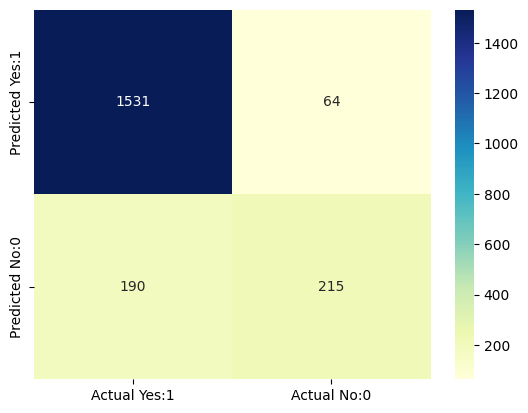

In [92]:
#Now we find the statistics of rfc1 model.

#firstly we find the train and test accuracy of rfc1 model.

#Train accuracy of rfc1 model.
y_train_pred_rfc1=rfc1.predict(x_train_sc)
ac_train_rfc1=accuracy_score(y_train,y_train_pred_rfc1)
print(f"The train accuracy of rfc1 model is: {ac_train_rfc1}.")
print()

#Test accuracy of rfc1 model.
ac_test_rfc1=accuracy_score(y_test,y_pred_rfc1)
print(f"The test accuracy of rfc1 model is: {ac_test_rfc1}.")
print()

#Now we find the confusion matrix of rfc1 model.
cm_rfc1=confusion_matrix(y_test,y_pred_rfc1)
print("The confusion matrix of rfc1 model is: ")
print(cm_rfc1)
print()

#Now here we create the dataframe of confusion matrix of rfc1 model.
cm_rfc1_df=pd.DataFrame(cm_rfc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_rfc1_df)
print()

#Now here we make the heatmap of confusion matrix of rfc1 model.
sns.heatmap(cm_rfc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_rfc1=cm_rfc1[0,0] #True positive.
tn_rfc1=cm_rfc1[1,1] #True  negative.
fp_rfc1=cm_rfc1[0,1] #False Positive.
fn_rfc1=cm_rfc1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of rfc1 model using confusion matrix. 
ac_cm_rfc1=(tp_rfc1+tn_rfc1)/(tp_rfc1+tn_rfc1+fp_rfc1+fn_rfc1)
print(f"The accuracy of rfc1 model using confusion matrix is: {ac_cm_rfc1}.")
print()

#Here we find the error of rfc1 model using confusion matrix.
error_cm_rfc1=1-ac_cm_rfc1
print(f"The error of rfc1 model using confusion matrix is: {error_cm_rfc1}.")
print()

#Here we find the precision of rfc1 model using confusion matrix. 
precision_cm_rfc1=(tp_rfc1)/(tp_rfc1+fp_rfc1)
print(f"The precision of rfc1 model using confusion matrix is: {precision_cm_rfc1}.")
print()

#Here we find the recall of rfc1 model using confusion matrix. 
recall_cm_rfc1=(tp_rfc1)/(tp_rfc1+fn_rfc1)
print(f"The recall of rfc1 model using confusion matrix is: {recall_cm_rfc1}.")
print()

#Here we find the f1_score of rfc1 model using confusion matrix. 
f1_score_cm_rfc1=(2*precision_cm_rfc1*recall_cm_rfc1)/(precision_cm_rfc1+recall_cm_rfc1)
print(f"The f1_scoreof rfc1 model using confusion matrix is: {f1_score_cm_rfc1}.")
print()

#Here we find the true positive ratio of rfc1 model using confusion matrix. 
tpr_cm_rfc1=(tp_rfc1)/(tp_rfc1+fn_rfc1)
print(f"The true positive ratio of rfc1 model using confusion matrix is: {tpr_cm_rfc1}.")
print()

#Here we find the false positive ratio of rfc1 model using confusion matrix. 
fpr_cm_rfc1=(fp_rfc1)/(fp_rfc1+tn_rfc1)
print(f"The false positive ratio of rfc1 model using confusion matrix is: {fpr_cm_rfc1}.")
print()

#Now here we find the classification report of rfc1 model.
cr_rfc1=classification_report(y_test,y_pred_rfc1)
print(f"The classification report of rfc1 model is: {cr_rfc1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of dtc1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 12%,precision is 95%,recall is 88.95%,f1_score is 92.34%.

##### As the tpr is 88.95% and fpr is 22.93%.

#### ------------------------------------------------------------------------------------------------


In [103]:
#Now we apply xtream gradient boosting classifier.

#### ------------------------------------------------------------------------------------------------
### (8) Xtream Gradient Classifier model.

##### As the Xtream Gradient classifier model uses the concept of ensemble learning.

##### As this is the example of bagging.

##### In this we use the different components such as bootstraping,voting.

##### Bootstraping means to split the dataset into random manner to apply different models.

##### And this is also known as sequential ensemble.

##### We can use any one of the voting i.e soft and hard voting.

##### Here we apply different algorithm on the dataset and then take mode of the data of all models..

##### Here we use learning_rate ,which fluctuates the gradient and try to achieve global minima.

##### And by using this we can resolve overfitting.

In [99]:
#8(a) Here we use Xtream Gradient classifier on original data.

#Here we create xtream gradient classifier model object.
xgbc=XGBClassifier(n_estimators=40,learning_rate=0.1)

#Here we train the xgbc model on original data.
xgbc.fit(x_train,y_train)

#Here we predict the values corresponding to x_test using xgbc model.
y_pred_xgbc=xgbc.predict(x_test)

#Here we find the bias of xgbc model.
bias_xgbc=xgbc.score(x_train,y_train)
print(f"The bias of xgbc model is: {bias_xgbc}.")

#Here we find the variance of xgbc model.
variance_xgbc=xgbc.score(x_test,y_test)
print(f"The variance of xgbc model is: {variance_xgbc}.")

The bias of xgbc model is: 0.881.
The variance of xgbc model is: 0.8675.


In [102]:
#8(b) Here we use Xtream Gradient classifier on scaled data.

#Here we create xtream gradient classifier model object.
xgbc1=XGBClassifier(n_estimators=15,learning_rate=0.1)

#Here we train the xgbc1 model on scaled data.
xgbc1.fit(x_train_sc,y_train)

#Here we predict the values corresponding to x_test_sc using xgbc1 model.
y_pred_xgbc1=xgbc1.predict(x_test_sc)

#Here we find the bias of xgbc1 model.
bias_xgbc1=xgbc1.score(x_train_sc,y_train)
print(f"The bias of xgbc1 model is: {bias_xgbc1}.")

#Here we find the variance of xgbc1 model.
variance_xgbc1=xgbc1.score(x_test_sc,y_test)
print(f"The variance of xgbc1 model is: {variance_xgbc1}.")

The bias of xgbc1 model is: 0.8675.
The variance of xgbc1 model is: 0.868.


#### ----------------------------------------------------------------------------------------------
### Conclusion of xtream gradient boosting Classifier model.

##### The xgbc1 has bias 86.75% and variance has 86.80%.

##### The xgbc has bias 88.10% and variance has 86.75%.

#### -----------------------------------------------------------------------------------------------

The train accuracy of xgbc1 model is: 0.8675.

The test accuracy of xgbc1 model is: 0.868.

The confusion matrix of xgbc1 model is: 
[[1553   42]
 [ 222  183]]

The dataframe of confusion matrix is: 
                 Actual Yes:1  Actual No:0
Predicted Yes:1          1553           42
Predicted No:0            222          183


The accuracy of xgbc1 model using confusion matrix is: 0.868.

The error of xgbc1 model using confusion matrix is: 0.132.

The precision of xgbc1 model using confusion matrix is: 0.9736677115987461.

The recall of xgbc1 model using confusion matrix is: 0.8749295774647887.

The f1_score of xgbc1 model using confusion matrix is: 0.9216617210682493.

The true positive ratio of xgbc1 model using confusion matrix is: 0.8749295774647887.

The false positive ratio of xgbc1 model using confusion matrix is: 0.18666666666666668.

The classification report of xgbc1 model is:               precision    recall  f1-score   support

           0       0.87      0.97      0.92

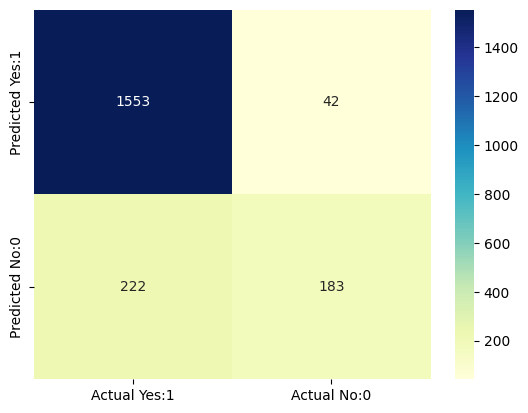

In [104]:
#Now we find the statistics of xgbc1 model.

#firstly we find the train and test accuracy of xgbc1 model.

#Train accuracy of xgbc1 model.
y_train_pred_xgbc1=xgbc1.predict(x_train_sc)
ac_train_xgbc1=accuracy_score(y_train,y_train_pred_xgbc1)
print(f"The train accuracy of xgbc1 model is: {ac_train_xgbc1}.")
print()

#Test accuracy of xgbc1 model.
ac_test_xgbc1=accuracy_score(y_test,y_pred_xgbc1)
print(f"The test accuracy of xgbc1 model is: {ac_test_xgbc1}.")
print()

#Now we find the confusion matrix of xgbc1 model.
cm_xgbc1=confusion_matrix(y_test,y_pred_xgbc1)
print("The confusion matrix of xgbc1 model is: ")
print(cm_xgbc1)
print()

#Now here we create the dataframe of confusion matrix of xgbc1 model.
cm_xgbc1_df=pd.DataFrame(cm_xgbc1,columns=["Actual Yes:1","Actual No:0"],index=["Predicted Yes:1","Predicted No:0"])
print("The dataframe of confusion matrix is: ")
print(cm_xgbc1_df)
print()

#Now here we make the heatmap of confusion matrix of xgbc1 model.
sns.heatmap(cm_xgbc1_df,annot=True,fmt="d",cmap="YlGnBu")
print()

#Now we find the terminologies of confusion matrix.

tp_xgbc1=cm_xgbc1[0,0] #True positive.
tn_xgbc1=cm_xgbc1[1,1] #True  negative.
fp_xgbc1=cm_xgbc1[0,1] #False Positive.
fn_xgbc1=cm_xgbc1[1,0] #False negative.

#Now we find the terms related to confusion matrix.

#Here we find the accuracy of xgbc1 model using confusion matrix. 
ac_cm_xgbc1=(tp_xgbc1+tn_xgbc1)/(tp_xgbc1+tn_xgbc1+fp_xgbc1+fn_xgbc1)
print(f"The accuracy of xgbc1 model using confusion matrix is: {ac_cm_xgbc1}.")
print()

#Here we find the error of xgbc1 model using confusion matrix.
error_cm_xgbc1=1-ac_cm_xgbc1
print(f"The error of xgbc1 model using confusion matrix is: {error_cm_xgbc1}.")
print()

#Here we find the precision of xgbc1 model using confusion matrix. 
precision_cm_xgbc1=(tp_xgbc1)/(tp_xgbc1+fp_xgbc1)
print(f"The precision of xgbc1 model using confusion matrix is: {precision_cm_xgbc1}.")
print()

#Here we find the recall of xgbc1 model using confusion matrix. 
recall_cm_xgbc1=(tp_xgbc1)/(tp_xgbc1+fn_xgbc1)
print(f"The recall of xgbc1 model using confusion matrix is: {recall_cm_xgbc1}.")
print()

#Here we find the f1_score of xgbc1 model using confusion matrix. 
f1_score_cm_xgbc1=(2*precision_cm_xgbc1*recall_cm_xgbc1)/(precision_cm_xgbc1+recall_cm_xgbc1)
print(f"The f1_score of xgbc1 model using confusion matrix is: {f1_score_cm_xgbc1}.")
print()

#Here we find the true positive ratio of xgbc1 model using confusion matrix. 
tpr_cm_xgbc1=(tp_xgbc1)/(tp_xgbc1+fn_xgbc1)
print(f"The true positive ratio of xgbc1 model using confusion matrix is: {tpr_cm_xgbc1}.")
print()

#Here we find the false positive ratio of xgbc1 model using confusion matrix. 
fpr_cm_xgbc1=(fp_xgbc1)/(fp_xgbc1+tn_xgbc1)
print(f"The false positive ratio of xgbc1 model using confusion matrix is: {fpr_cm_xgbc1}.")
print()

#Now here we find the classification report of xgbc1 model.
cr_xgbc1=classification_report(y_test,y_pred_xgbc1)
print(f"The classification report of xgbc1 model is: {cr_xgbc1}.")
print()

#### ----------------------------------------------------------------------------------------------
### Conclusion of statistics of dtc1 model.

##### As the train acuuracy and test accuracy is very high and difference is very small,so it is best fit model.

##### As the error is 13%,precision is 97%,recall is 87.49%,f1_score is 92.16%.

##### As the tpr is 87.49% and fpr is 18.66%.

#### ------------------------------------------------------------------------------------------------

In [105]:
#Now here we try the cross validation on xgbc1 model.

scores=cross_val_score(estimator=xgbc1,X=x_train_sc,y=y_train,cv=10)

print(f"The accuracy of cross validation of xgbc1 model is: {scores.mean()}.")

print(f"The standard deviation of cross validation of xgbc1 model is: {scores.std()}.")

print(f"The variance of cross validation of xgbc1 model is: {scores.var()}.")

The accuracy of cross validation of xgbc1 model is: 0.857375.
The standard deviation of cross validation of xgbc1 model is: 0.006811066362912647.
The variance of cross validation of xgbc1 model is: 4.639062500000012e-05.


#### ----------------------------------------------------------------------------------------------
### Conclusion of cross validation on lor1 model.

##### As the accuracy not increases so much.

##### The standard deviation is 0.006.

##### The variance is 0.00046.

#### ------------------------------------------------------------------------------------------------

In [106]:
#Now we save the best model.

#### ----------------------------------------------------------------------------------------------
### Here we use pickle.

##### The pickle library is used to do the serialization and deserialization.

##### And we save the model in binary format with the extension (.pkl) .

##### As we use two functions of pickle library i.e dump and load.

##### Dump function is used when we want to do the serialization or save the model.

##### In dump function we always use wb i.e write binary.

##### Load function is used when we want to do the deserialization or load the model.

##### In load function we always use rb i.e read binary.

##### We can also used joblib as replacement of pickle library,which is light weight program.

In [107]:
#As rfc1 i.e the random forest model on scaled data is best model,so we saved it.

#Now here we save the ,model.

pickle.dump(rfc1,open(r"C:\sudhanshu_projects\project-task-training-course\Customer Churn Prevention Model\Customer_churn_prediction.pkl","wb"))

In [108]:
#Now we load the saved model.

model=pickle.load(open(r"C:\sudhanshu_projects\project-task-training-course\Customer Churn Prevention Model\Customer_churn_prediction.pkl","rb"))

In [109]:
#Now we test the loaded model

model.score(x_test_sc,y_test)

0.873